In [14]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df=pd.read_csv('/Users/erningxu/Desktop/data assignment/Midterm/data/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [15]:
print('rows: '+str(df.shape[0]))
print('columns: '+str(df.shape[1]))

rows: 1197
columns: 15


In [16]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [17]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


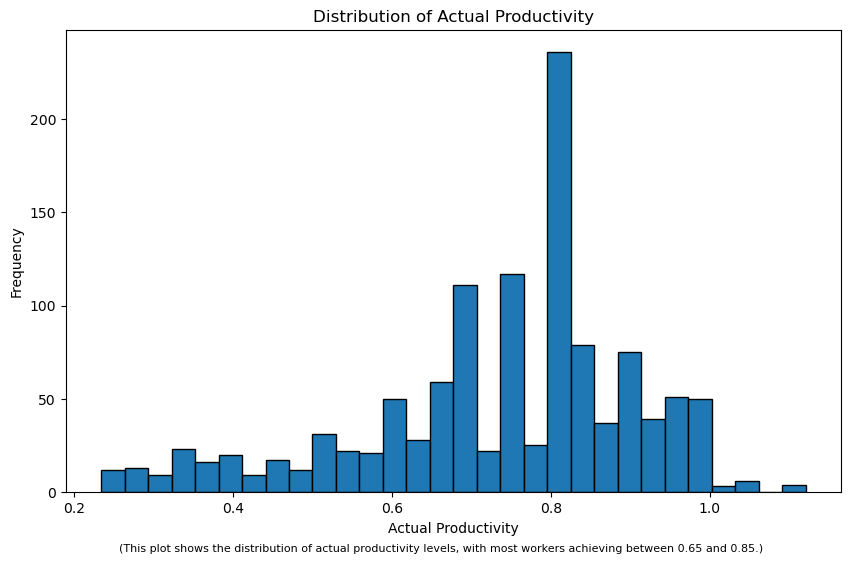

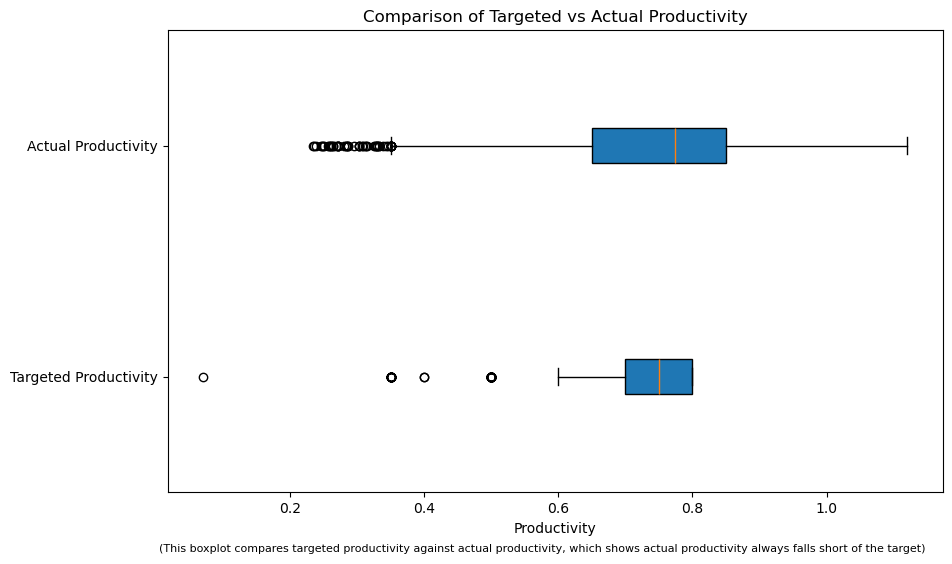

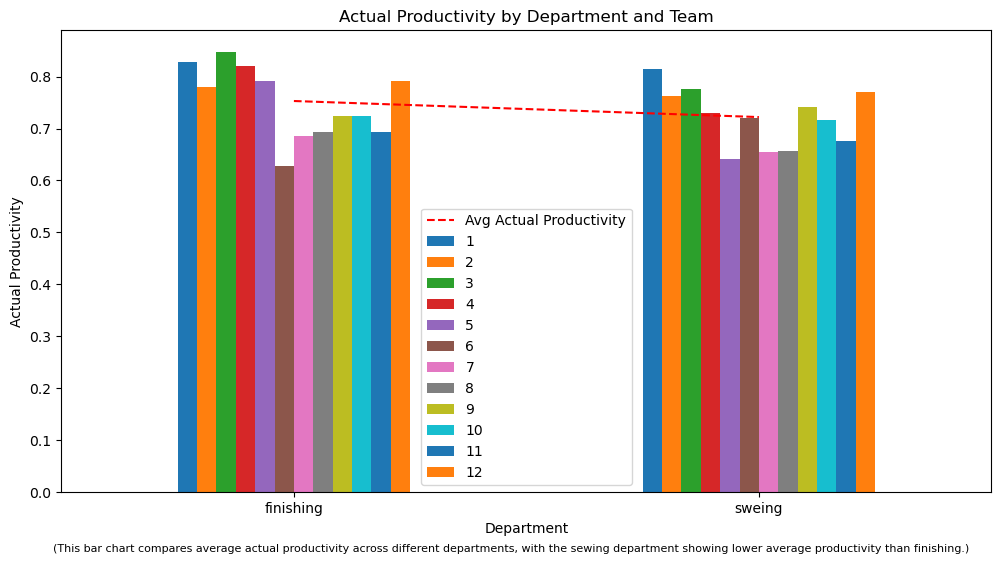

['sweing' 'finishing']


In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['actual_productivity'], bins=30, edgecolor='black')
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.figtext(0.5, 0.01, '(This plot shows the distribution of actual productivity levels, with most workers achieving between 0.65 and 0.85.)', ha='center', fontsize=8)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([df['targeted_productivity'], df['actual_productivity']],patch_artist=True,vert=False)
plt.yticks([1, 2], ['Targeted Productivity', 'Actual Productivity'])
plt.title('Comparison of Targeted vs Actual Productivity')
plt.xlabel('Productivity')
plt.figtext(0.5, 0.01, '(This boxplot compares targeted productivity against actual productivity, which shows actual productivity always falls short of the target)', ha='center', fontsize=8)
plt.show()

df['department'] = df['department'].str.strip().str.lower()
grouped = df.groupby(['department', 'team'])['actual_productivity'].mean().unstack()
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Actual Productivity by Department and Team')
plt.ylabel('Actual Productivity')
plt.xlabel('Department')
plt.xticks(rotation=360)
plt.legend(title='Team')
plt.figtext(0.5, 0.01, '(This bar chart compares average actual productivity across different departments, with the sewing department showing lower average productivity than finishing.)', ha='center', fontsize=8)
avg_productivity = df.groupby(['department'])['actual_productivity'].mean()
departments = avg_productivity.index
plt.plot(departments, avg_productivity, linestyle='dashed', color='red', label='Avg Actual Productivity')
plt.legend()
plt.show()
print(df['department'].unique())


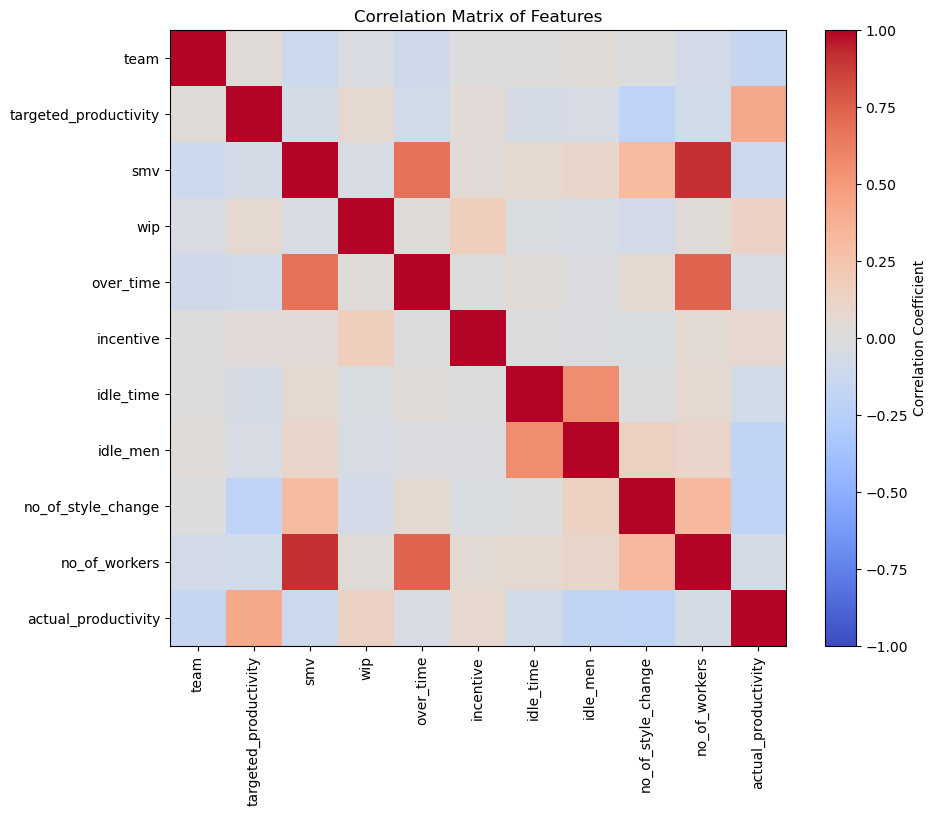

In [19]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix,cmap='coolwarm',interpolation='none', vmin=-1, vmax=1)
plt.colorbar(label="Correlation Coefficient")
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Features')
plt.show()



In [20]:
from sklearn.model_selection import TimeSeriesSplit
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
data = df.sort_values(by='date')
X = df.drop(columns=['date', 'actual_productivity'])  # Dropping date and target from features
y = df['actual_productivity']

tscv = TimeSeriesSplit(n_splits=3)
splits = list(tscv.split(X, y))
train_index = splits[0][0]  
val_index = splits[1][1]     
test_index = splits[2][1]   
X_train = X.iloc[train_index]
y_train = y.iloc[train_index]
X_val = X.iloc[val_index]
y_val = y.iloc[val_index]
X_test = X.iloc[test_index]
y_test = y.iloc[test_index]


train_date_range = (data.iloc[train_index]['date'].min(), data.iloc[train_index]['date'].max())
val_date_range = (data.iloc[val_index]['date'].min(), data.iloc[val_index]['date'].max())
test_date_range = (data.iloc[test_index]['date'].min(), data.iloc[test_index]['date'].max())

print("Training set date range:", train_date_range)
print("Validation set date range:", val_date_range)
print("Test set date range:", test_date_range)


Training set date range: (Timestamp('2015-01-01 00:00:00'), Timestamp('2015-01-18 00:00:00'))
Validation set date range: (Timestamp('2015-02-04 00:00:00'), Timestamp('2015-02-23 00:00:00'))
Test set date range: (Timestamp('2015-02-23 00:00:00'), Timestamp('2015-03-11 00:00:00'))


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
onehot_ftrs = ['department', 'day']  
std_ftrs = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'team', 'no_of_workers']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(300, 13)
(300, 18)
[[ 0.          1.          0.         ...  0.          0.50022296
   1.12456265]
 [ 1.          0.          0.         ...  0.         -1.56762787
  -1.12016124]
 [ 0.          1.          0.         ...  0.          1.38644475
  -0.12984187]
 ...
 [ 0.          1.          0.         ...  0.         -0.38599882
   1.08054846]
 [ 1.          0.          0.         ...  0.          1.38644475
  -1.16417543]
 [ 1.          0.          0.         ...  0.         -0.38599882
  -1.12016124]]
